# The cars on uk roads

Analyse the trends in vehicle fuel type licenced in the uk

Import pandas and matplotlib. read df_VEH0120_GB.csv into dataframe copy it and select only vehicles that are currently registered and print the first 5 entries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df_vehicles_raw = pd.read_csv("C:\\Users\\danie\\Downloads\\df_VEH0120_GB.csv")
df_vehicles = df_vehicles_raw[df_vehicles_raw['LicenceStatus']=='Licensed']
print(df_vehicles.head())
df_vehicles_T = df_vehicles.transpose()


  BodyType    Make       GenModel                          Model    Fuel  \
0     Cars  ABARTH     ABARTH 124                124 GT MULTIAIR  Petrol   
2     Cars  ABARTH     ABARTH 124           124 GT MULTIAIR AUTO  Petrol   
4     Cars  ABARTH  ABARTH SPIDER            124 SPIDER MULTIAIR  Petrol   
6     Cars  ABARTH  ABARTH SPIDER       124 SPIDER MULTIAIR AUTO  Petrol   
8     Cars  ABARTH  ABARTH SPIDER  124 SPIDER SCORPIONE MULTIAIR  Petrol   

  LicenceStatus  2024Q2  2024Q1  2023Q4  2023Q3  ...  2003Q4  2002Q4  2001Q4  \
0      Licensed      16      16      16      16  ...       0       0       0   
2      Licensed      24      25      25      26  ...       0       0       0   
4      Licensed     964     964     952     987  ...       0       0       0   
6      Licensed     648     653     643     658  ...       0       0       0   
8      Licensed      60      59      57      60  ...       0       0       0   

   2000Q4  1999Q4  1998Q4  1997Q4  1996Q4  1995Q4  1994Q4  
0 

inspect the data for null values in each column
data appears quite clean except for one null value in the GenModel column

In [4]:
print(df_vehicles.info())
print(df_vehicles.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 136997 entries, 0 to 235193
Data columns (total 84 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   BodyType       136997 non-null  object
 1   Make           136997 non-null  object
 2   GenModel       136996 non-null  object
 3   Model          136997 non-null  object
 4   Fuel           136997 non-null  object
 5   LicenceStatus  136997 non-null  object
 6   2024Q2         136997 non-null  int64 
 7   2024Q1         136997 non-null  int64 
 8   2023Q4         136997 non-null  int64 
 9   2023Q3         136997 non-null  int64 
 10  2023Q2         136997 non-null  int64 
 11  2023Q1         136997 non-null  int64 
 12  2022Q4         136997 non-null  int64 
 13  2022Q3         136997 non-null  int64 
 14  2022Q2         136997 non-null  int64 
 15  2022Q1         136997 non-null  int64 
 16  2021Q4         136997 non-null  int64 
 17  2021Q3         136997 non-null  int64 
 18  2021Q2   

create and display pivot table showing total cars licenced by fuel type

In [5]:
fuel_pivot = pd.pivot_table(df_vehicles, index=['Fuel'], values=["2024Q2"], aggfunc = 'sum')

print (fuel_pivot)

                                    2024Q2
Fuel                                      
Battery electric                   1298086
Diesel                            16045904
Fuel cell electric                     194
Gas                                  37684
Hybrid electric (diesel)            106069
Hybrid electric (petrol)           1837141
Other fuel types                      2449
Petrol                            20504883
Plug-in hybrid electric (diesel)     10701
Plug-in hybrid electric (petrol)    585170
Range extended electric              20628


Create pivot table of electric car registrations in the 5 years to 2024Q2 and plot


BodyType     Cars
2014Q2       8531
2014Q3      10425
2014Q4      12117
2015Q1      14264
2015Q2      15934
2015Q3      17881
2015Q4      20472
2016Q1      23193
2016Q2      24763
2016Q3      27326
2016Q4      29086
2017Q1      32836
2017Q2      35337
2017Q3      38774
2017Q4      41222
2018Q1      44748
2018Q2      47648
2018Q3      51361
2018Q4      55338
2019Q1      60207
2019Q2      65621
2019Q3      77515
2019Q4      89581
2020Q1     106798
2020Q2     118330
2020Q3     152335
2020Q4     191596
2021Q1     221354
2021Q2     262297
2021Q3     311108
2021Q4     374597
2022Q1     435636
2022Q2     485772
2022Q3     540158
2022Q4     620632
2023Q1     691307
2023Q2     767906
2023Q3     850598
2023Q4     916576
2024Q1     993840
2024Q2    1071962


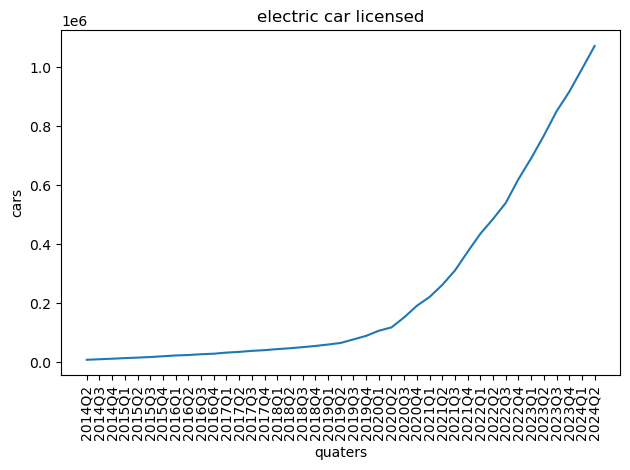

In [6]:

df_electric_vehicles=df_vehicles[(df_vehicles["Fuel"]=="Battery electric")&(df_vehicles['BodyType']=="Cars")]

df_electric_vehicles_pivot = pd.pivot_table(df_electric_vehicles, index=['BodyType'], values=['2024Q2','2024Q1','2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1','2018Q4','2018Q3','2018Q2','2018Q1', '2017Q4','2017Q3','2017Q2','2017Q1', '2016Q4', '2016Q3', '2016Q2','2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2'], aggfunc = 'sum')
print(df_electric_vehicles_pivot.transpose())
plt.plot(df_electric_vehicles_pivot.transpose())
plt.title("electric car licensed")
plt.ylabel("cars")
plt.xlabel("quaters")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Create pivot table of petrol car registrations in the 5 years to 2024Q2 and plot


Petrol cars licensed in the 10 years between between 2014Q2 and 2024Q2


BodyType      Cars
2014Q2    18968763
2014Q3    18988777
2014Q4    18632157
2015Q1    18592507
2015Q2    18645465
2015Q3    18635596
2015Q4    18511097
2016Q1    18509140
2016Q2    18539377
2016Q3    18529618
2016Q4    18409876
2017Q1    18455566
2017Q2    18492948
2017Q3    18491451
2017Q4    18347746
2018Q1    18403154
2018Q2    18518869
2018Q3    18574035
2018Q4    18499285
2019Q1    18643439
2019Q2    18787594
2019Q3    18886340
2019Q4    18821574
2020Q1    18699892
2020Q2    18681035
2020Q3    18829398
2020Q4    18682539
2021Q1    18670711
2021Q2    18858649
2021Q3    18807402
2021Q4    18674252
2022Q1    18665766
2022Q2    18751545
2022Q3    18741280
2022Q4    18690894
2023Q1    18716494
2023Q2    18828151
2023Q3    18824965
2023Q4    18740091
2024Q1    18774250
2024Q2    18842693


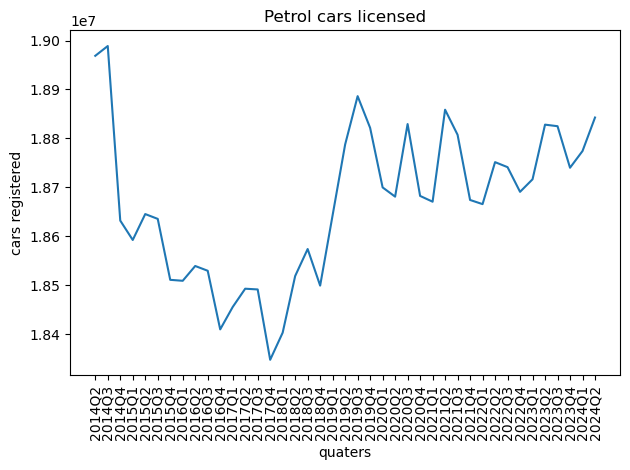

In [7]:

df_petrol_table=df_vehicles[(df_vehicles["Fuel"]=="Petrol")&(df_vehicles['BodyType']=="Cars")]

df_petrol_cars_pivot = pd.pivot_table(df_petrol_table, index=['BodyType'], values=['2024Q2','2024Q1','2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1','2018Q4','2018Q3','2018Q2','2018Q1', '2017Q4','2017Q3','2017Q2','2017Q1', '2016Q4', '2016Q3', '2016Q2','2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2'], aggfunc = 'sum')
print(df_petrol_cars_pivot.transpose())
plt.plot(df_petrol_cars_pivot.transpose())
plt.title("Petrol cars licensed")
plt.ylabel("cars registered")
plt.xlabel("quaters")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Diesel cars licensed in the 10 years between between 2014Q2 and 2024Q2


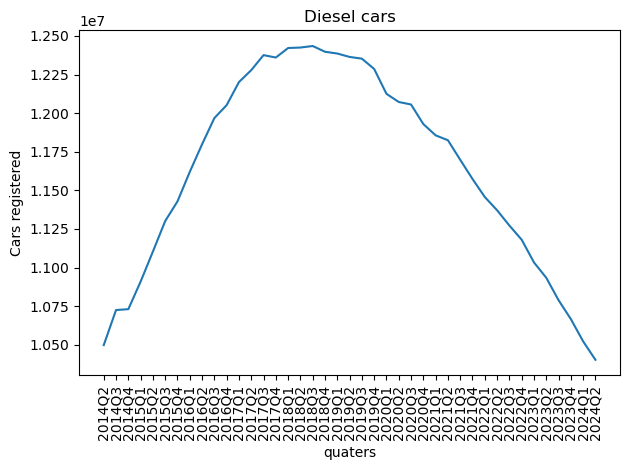

In [8]:
df_Diesel_table=df_vehicles[(df_vehicles["Fuel"]=="Diesel")&(df_vehicles['BodyType']=="Cars")]
df_Diesel_cars_pivot = pd.pivot_table(df_Diesel_table, index=['BodyType'], values=['2024Q2','2024Q1','2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1','2018Q4','2018Q3','2018Q2','2018Q1', '2017Q4','2017Q3','2017Q2','2017Q1', '2016Q4', '2016Q3', '2016Q2','2016Q1', '2015Q4', '2015Q3', '2015Q2','2015Q1', '2014Q4', '2014Q3', '2014Q2'], aggfunc = 'sum')
df_diesel_transposed = df_Diesel_cars_pivot.transpose()
plt.plot(df_diesel_transposed)
plt.title("Diesel cars")
plt.ylabel("Cars registered")
plt.xlabel("quaters")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

total cars licensed in the 10 years between between 2014Q2 and 2024Q2


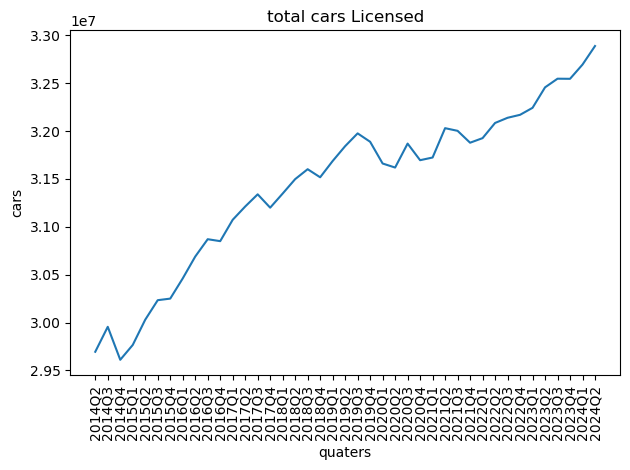

In [9]:
df_cars_table=df_vehicles[(df_vehicles['BodyType']=="Cars")]
df_cars_pivot = pd.pivot_table(df_cars_table, index=['BodyType'], values=['2024Q2','2024Q1','2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1','2018Q4','2018Q3','2018Q2','2018Q1', '2017Q4','2017Q3','2017Q2','2017Q1', '2016Q4', '2016Q3', '2016Q2','2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2'], aggfunc = 'sum')
df_cars_transposed = df_cars_pivot.transpose()
plt.plot(df_cars_transposed)
plt.title("total cars Licensed")
plt.ylabel("cars")
plt.xlabel("quaters")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

all types of hybrid cars licensed in the 10 years between between 2014Q2 and 2024Q2


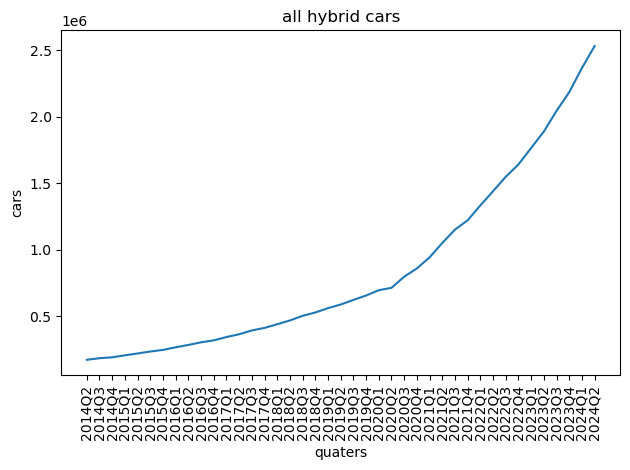

In [28]:

#df_hybrid=df_vehicles[(df_vehicles['BodyType']=='Cars')& ((df_vehicles['Fuel']=='Hybrid electric (petrol)') | (df_vehicles['Fuel']=='Hybrid electric (diesel)')| (df_vehicles['Fuel']=='Plug-in hybrid electric (diesel)')| (df_vehicles['Fuel']=='Plug-in hybrid electric (petrol)'))]

hybrid_fuels = [
    'Hybrid electric (petrol)',
    'Hybrid electric (diesel)',
    'Plug-in hybrid electric (diesel)',
    'Plug-in hybrid electric (petrol)'
]
df_hybrid = df_vehicles[(df_vehicles['BodyType']=='Cars') & (df_vehicles['Fuel'].isin(hybrid_fuels))]



df_hybrid_pivot = pd.pivot_table(df_hybrid, index=['BodyType'], values=['2024Q2','2024Q1','2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1','2018Q4','2018Q3','2018Q2','2018Q1', '2017Q4','2017Q3','2017Q2','2017Q1', '2016Q4', '2016Q3', '2016Q2','2016Q1', '2015Q4', '2015Q3', '2015Q2','2015Q1', '2014Q4', '2014Q3', '2014Q2'], aggfunc = 'sum')

df_hybrid_transposed = df_hybrid_pivot.transpose()
plt.plot(df_hybrid_transposed)
plt.title("all hybrid cars")
plt.ylabel("cars")
plt.xlabel("quaters")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Proportion of cars by fuel type in 2024Q2

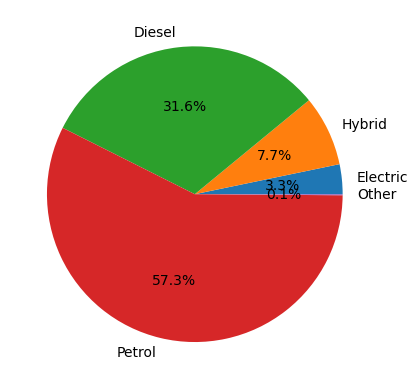

In [12]:
# Filter data
df_all = df_vehicles[df_vehicles['BodyType'] == 'Cars']
hybrid_fuels = [
    'Hybrid electric (petrol)',
    'Hybrid electric (diesel)',
    'Plug-in hybrid electric (diesel)',
    'Plug-in hybrid electric (petrol)'
]
df_hybrid = df_all[df_all['Fuel'].isin(hybrid_fuels)]

all_total = df_all['2024Q2'].sum()
hybrid_total = df_hybrid['2024Q2'].sum()
electric_total = df_electric_vehicles.loc[df_electric_vehicles['Fuel'] == 'Battery electric', '2024Q2'].sum()
diesel_total = df_Diesel_table.loc[df_Diesel_table['Fuel'] == 'Diesel', '2024Q2'].sum()
petrol_total = df_petrol_table.loc[df_petrol_table['Fuel'] == 'Petrol', '2024Q2'].sum()

other_total = all_total - (hybrid_total + electric_total + diesel_total + petrol_total)

sizes = [electric_total, hybrid_total, diesel_total, petrol_total, other_total]
labels = ['Electric', 'Hybrid', 'Diesel', 'Petrol', 'Other']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Proportion of cars by fuel type in 2014Q2


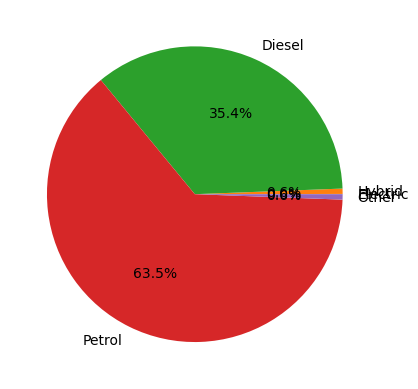

In [18]:
df_all = df_vehicles[df_vehicles['BodyType'] == 'Cars']
hybrid_fuels = [
    'Hybrid electric (petrol)',
    'Hybrid electric (diesel)',
    'Plug-in hybrid electric (diesel)',
    'Plug-in hybrid electric (petrol)'
]
df_hybrid = df_all[df_all['Fuel'].isin(hybrid_fuels)]

all_total = df_all['2014Q2'].sum()
hybrid_total = df_hybrid['2014Q2'].sum()
electric_total = df_electric_vehicles.loc[df_electric_vehicles['Fuel'] == 'Battery electric', '2014Q2'].sum()
diesel_total = df_Diesel_table.loc[df_Diesel_table['Fuel'] == 'Diesel', '2014Q2'].sum()
petrol_total = df_petrol_table.loc[df_petrol_table['Fuel'] == 'Petrol', '2024Q2'].sum()

other_total = all_total - (hybrid_total + electric_total + diesel_total + petrol_total)

sizes = [electric_total, hybrid_total, diesel_total, petrol_total, other_total]
labels = ['Electric', 'Hybrid', 'Diesel', 'Petrol', 'Other']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

who is makng electric vehicles?

            2024Q2          %
Make                         
TESLA       204155  19.044985
BMW          83247   7.765854
VOLKSWAGEN   76018   7.091483
MG           70804   6.605085
NISSAN       66873   6.238374
AUDI         64055   5.975492
KIA          62766   5.855245
MERCEDES     56304   5.252425
HYUNDAI      54045   5.041690
VAUXHALL     38546   3.595836


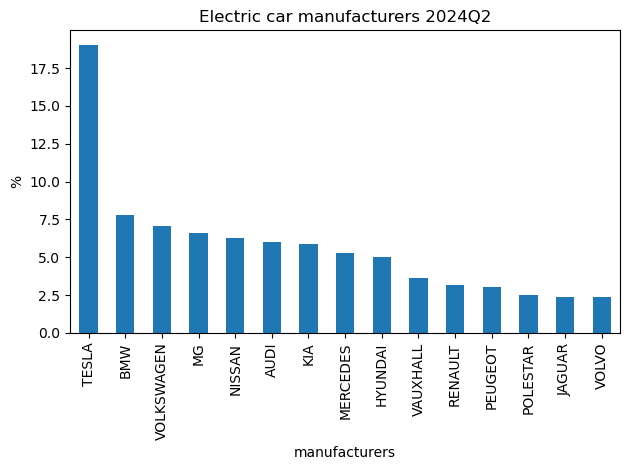

In [13]:
df_make=df_vehicles[(df_vehicles['BodyType']=='Cars')& (df_vehicles['Fuel']=='Battery electric')]
make_pivot=pd.pivot_table(df_make, index=['Make'], values=['2024Q2'], aggfunc='sum').sort_values(by = '2024Q2', ascending=False)
make_pivot['%']= (make_pivot['2024Q2']/make_pivot['2024Q2'].sum())*100

print(make_pivot.head(10))
make_pivot['%'].head(15).plot(kind='bar')
plt.title("Electric car manufacturers 2024Q2")
plt.ylabel("%")
plt.xlabel("manufacturers")
plt.xticks()
plt.tight_layout()
plt.show()

                                    2024Q2          %
Fuel                                                 
Petrol                            18842693  57.292691
Diesel                            10403025  31.631216
Hybrid electric (petrol)           1834465   5.577835
Battery electric                   1071962   3.259385
Plug-in hybrid electric (petrol)    584164   1.776197
Hybrid electric (diesel)            103622   0.315071
Gas                                  27963   0.085024
Plug-in hybrid electric (diesel)     10701   0.032537
Range extended electric               9520   0.028946
Other fuel types                       236   0.000718


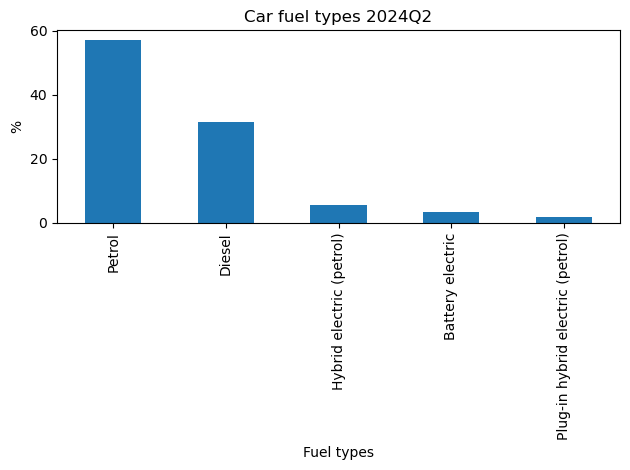

In [14]:
df_fuel=df_vehicles[(df_vehicles['BodyType']=='Cars')]
fuel_pivot = pd.pivot_table(df_fuel, index=['Fuel'], values=['2024Q2'], aggfunc='sum').sort_values(by = '2024Q2', ascending=False)
fuel_pivot['%']= (fuel_pivot['2024Q2']/fuel_pivot['2024Q2'].sum())*100

print(fuel_pivot.head(10))
fuel_pivot['%'].head(5).plot(kind='bar')
plt.title("Car fuel types 2024Q2")
plt.ylabel("%")
plt.xlabel("Fuel types")
plt.xticks()
plt.tight_layout()
plt.show()

          2024Q2          %
Make                       
TOYOTA    653628  33.682893
HYUNDAI   152790   7.873606
NISSAN    149914   7.725399
LEXUS     145427   7.494174
KIA       142313   7.333703
HONDA     115304   5.941870
FORD      102211   5.267158
SUZUKI     95719   4.932611
VOLVO      87728   4.520817
MERCEDES   87146   4.490826


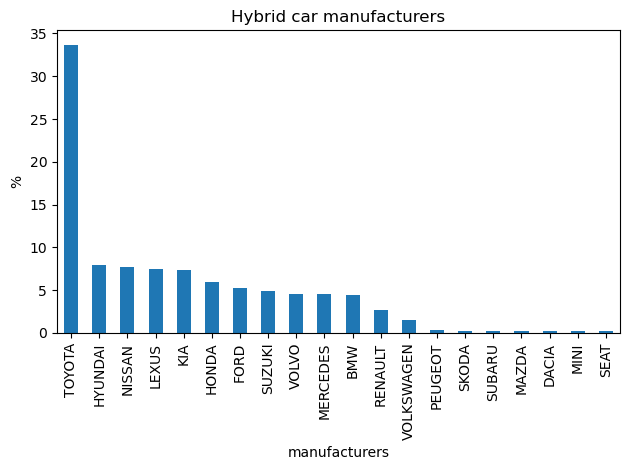

In [15]:
df_make=df_vehicles[(df_vehicles['BodyType']=='Cars')& (df_vehicles['Fuel']=='Hybrid electric (petrol)') | (df_vehicles['Fuel']=='Hybrid electric (diesel)')]
make_pivot=pd.pivot_table(df_make, index=['Make'], values=['2024Q2'], aggfunc='sum').sort_values(by = '2024Q2', ascending=False)
make_pivot['%']= (make_pivot['2024Q2']/make_pivot['2024Q2'].sum())*100

print(make_pivot.head(10))
make_pivot['%'].head(20).plot(kind='bar')
plt.title("Hybrid car manufacturers")
plt.ylabel("%")
plt.xlabel("manufacturers")
plt.xticks()
plt.tight_layout()
plt.show()